
### Датасет і ML задача

Для виконання завдання я використовую набір даних з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

### Опис змінних

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Що було зроблено:

1. Проведено Exploratory Data Analysis і висунула гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описала, які методи я вважаю доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провела препроцесинг даних для подальшої їх передачі в модель. Препроцесинг  включав
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувала 4 різні типи моделей машинного навчання:
  - Logistic Regression
  - kNN
  - Decision Tree
  - XGBoost

5. Створила таблицю з порівнянням якості моделей, де зазначила
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконала процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  

7. Вивела  важливість ознак для моделі

8. Для  аналіз впливу ознак на передбачення використовувала бібліотеку SHAP.

9. Провела аналіз записів, в яких модель помиляється і на основі нього зазначили, яким чином можна поліпшити наявне рішення аби уникати наявних помилок





# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("bank-additional-full.csv", sep=";")

# EDA

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.shape


(41188, 21)

In [ ]:
len(df.select_dtypes(include="number").columns)

10

In [ ]:
len(df.select_dtypes(include = "object").columns)

11

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.nunique()

,0
age,78
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


* Маємо ~41k рядків та 21 колонки.

* В наборі даних 10 числових і 11 категоріальних колонок, включаючи таргет колонку **y**
*  Кожен стовпець показує: 41188 non-null, тобто жодного пропущеного значення

## Univariate Analysis

## Numeric variables

Побудуємо гістограми для всіх числових ознак і виводимо коефіцієнт асиметрії (skewness). Ознаки в наборі даних з асиметрією 0 показують симетричний розподіл. Якщо асиметрія дорівнює 1 або більше, це свідчить про позитивно асиметричний (праворуч) розподіл. У праворуч асиметрованому розподілі хвіст простягається більше праворуч, що вказує на наявність надзвичайно високих значень.

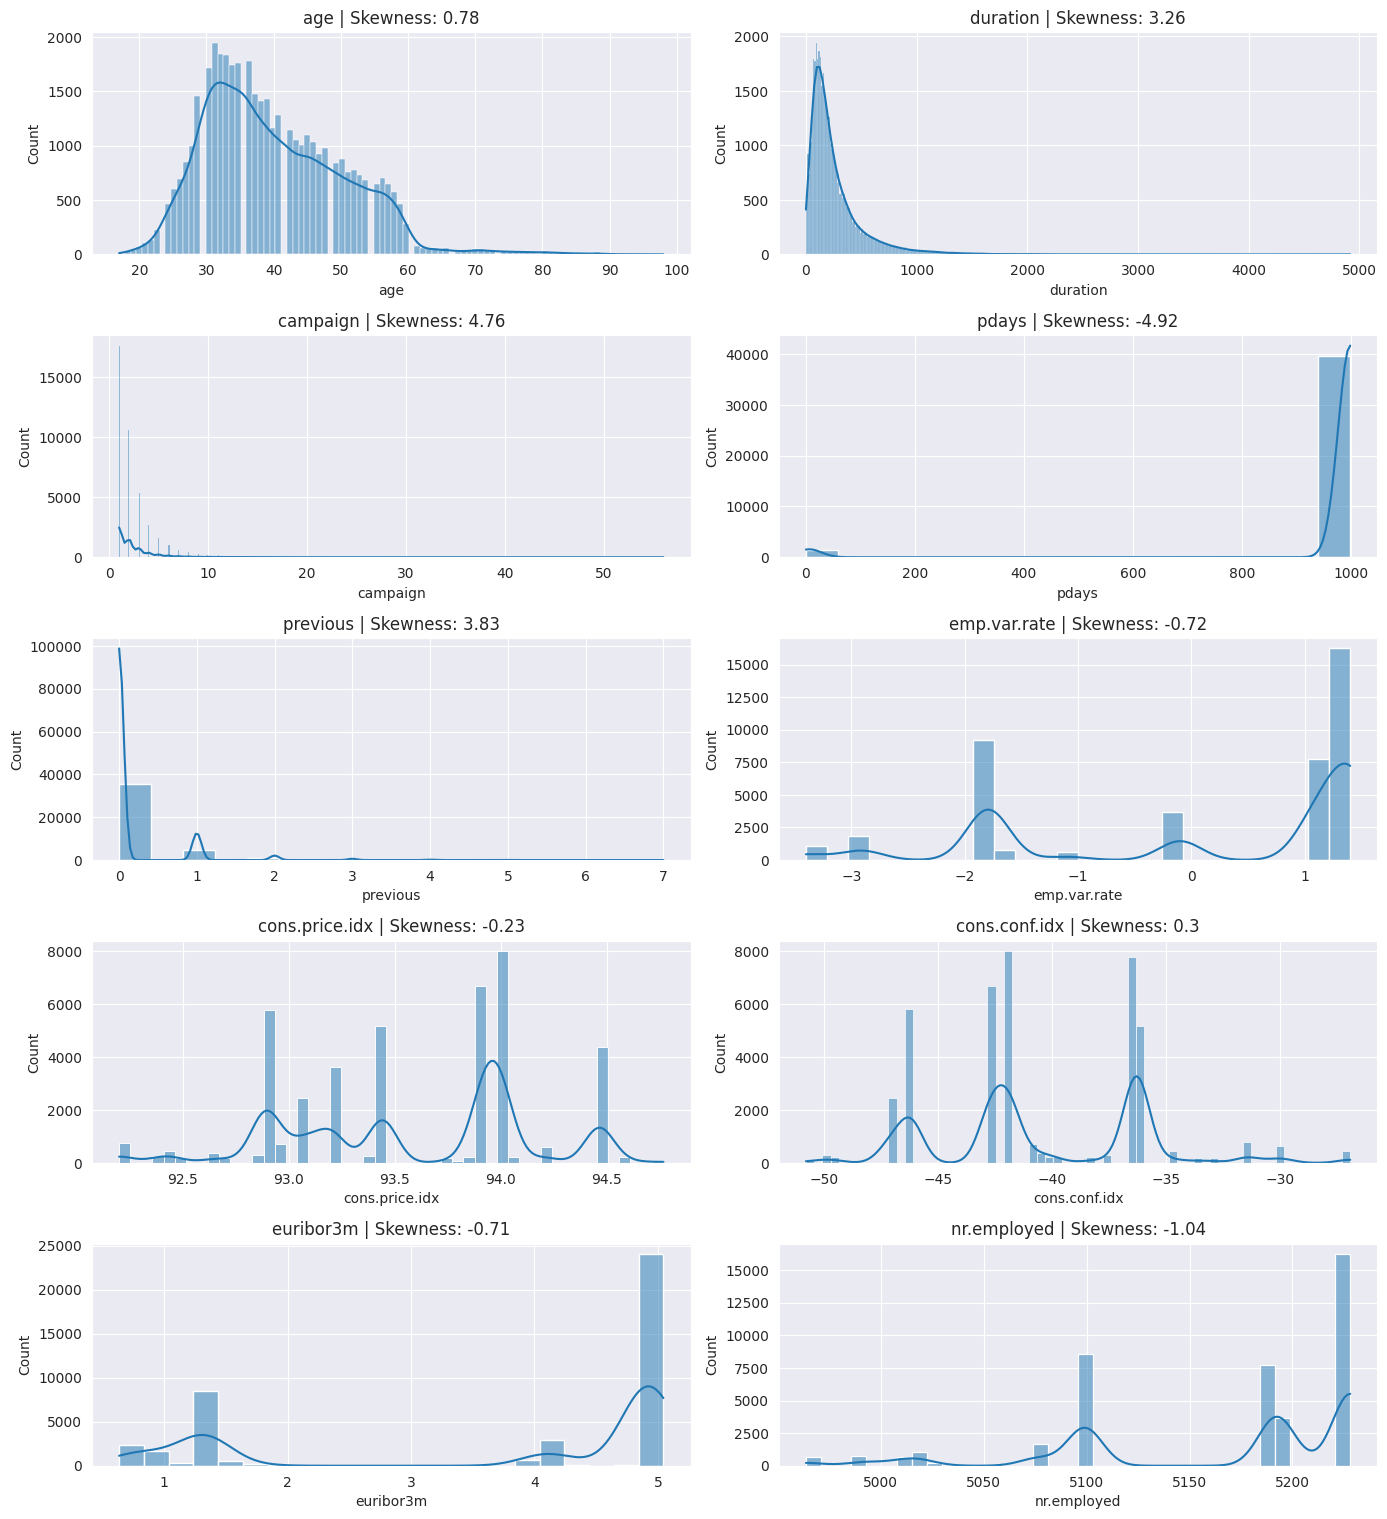

In [ ]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

* age – майже нормальний розподіл, основна маса клієнтів 30–40 років.

* duration – сильна правостороння асиметрія, довгі дзвінки рідкісні (не використовувати у фінальній моделі).

* campaign – дуже правостороння асиметрія, більшість мають 1–2 контакти, рідко >40.

* pdays – різко лівосторонній розподіл, 999 означає, що клієнта не контактували.

* previous – правостороння асиметрія, більшість не мали попередніх контактів.

* emp.var.rate – кілька піків, що відображають економічні періоди.

* cons.price.idx – скупчення значень у вузькому діапазоні, залежить від економічного періоду.

* cons.conf.idx – кілька піків, що відображають різні рівні споживчої довіри.

* euribor3m – кластерні піки, пов’язані з різними економічними фазами.

* nr.employed – скупчення значень, що відповідають різним кварталам зайнятості.


--- age ---
Кількість викидів: 469 (1.14%)
Мінімум: 17, Максимум: 98
Межі для викидів: 9.50 .. 69.50



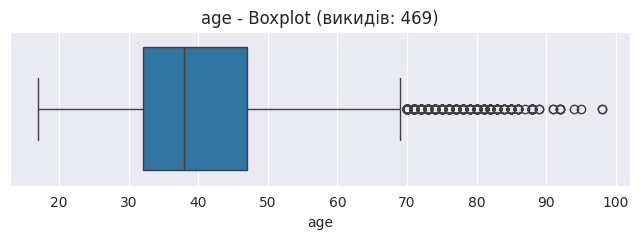

--- duration ---
Кількість викидів: 2963 (7.19%)
Мінімум: 0, Максимум: 4918
Межі для викидів: -223.50 .. 644.50



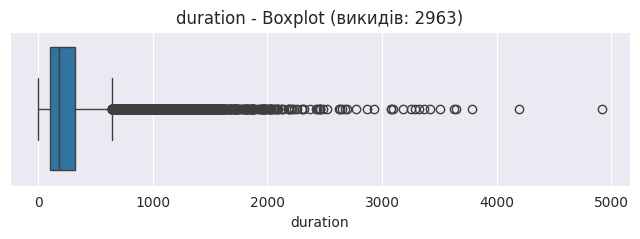

--- campaign ---
Кількість викидів: 2406 (5.84%)
Мінімум: 1, Максимум: 56
Межі для викидів: -2.00 .. 6.00



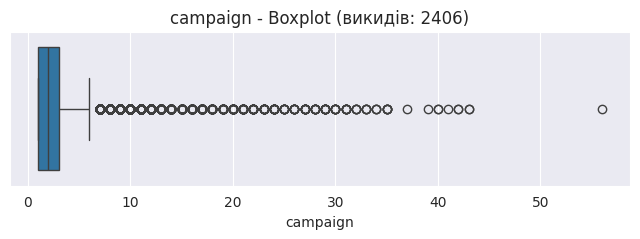

--- pdays ---
Кількість викидів: 1515 (3.68%)
Мінімум: 0, Максимум: 999
Межі для викидів: 999.00 .. 999.00



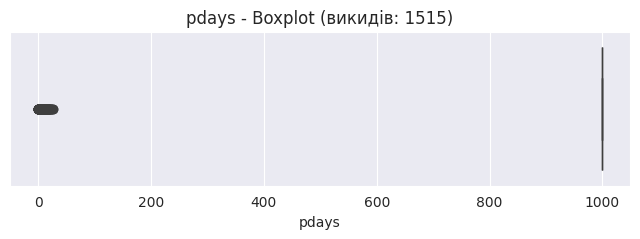

--- previous ---
Кількість викидів: 5625 (13.66%)
Мінімум: 0, Максимум: 7
Межі для викидів: 0.00 .. 0.00



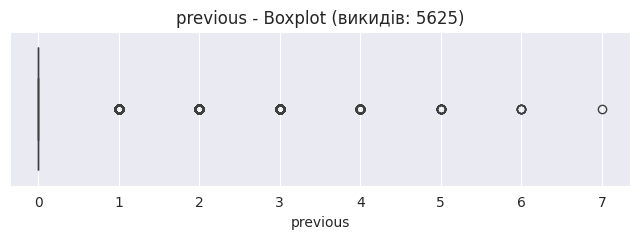

--- emp.var.rate ---
Кількість викидів: 0 (0.00%)
Мінімум: -3.4, Максимум: 1.4
Межі для викидів: -6.60 .. 6.20



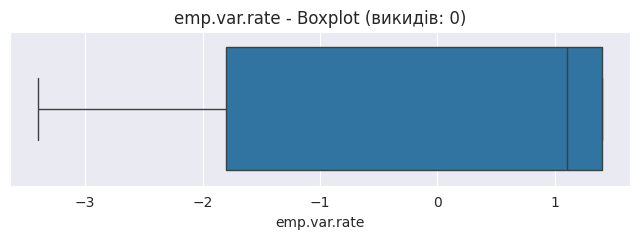

--- cons.price.idx ---
Кількість викидів: 0 (0.00%)
Мінімум: 92.201, Максимум: 94.767
Межі для викидів: 91.70 .. 95.37



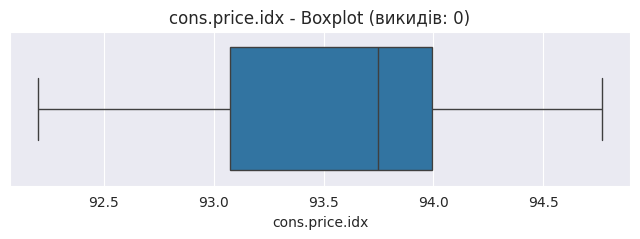

--- cons.conf.idx ---
Кількість викидів: 447 (1.09%)
Мінімум: -50.8, Максимум: -26.9
Межі для викидів: -52.15 .. -26.95



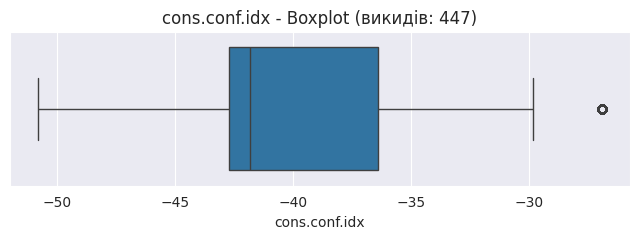

--- euribor3m ---
Кількість викидів: 0 (0.00%)
Мінімум: 0.634, Максимум: 5.045
Межі для викидів: -4.08 .. 10.39



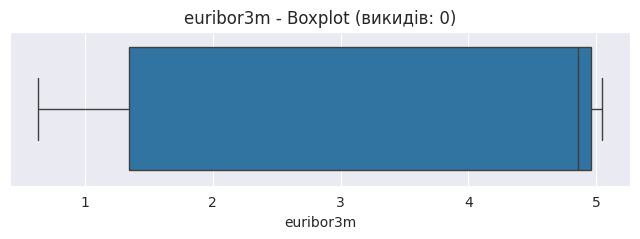

--- nr.employed ---
Кількість викидів: 0 (0.00%)
Мінімум: 4963.6, Максимум: 5228.1
Межі для викидів: 4905.60 .. 5421.60



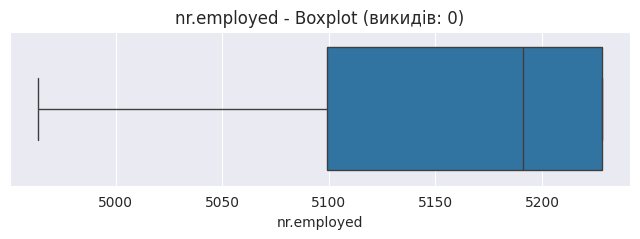

In [ ]:
def plot_outliers(df, method="IQR", whisker=1.5):
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns

    for col in num_cols:
        series = df[col]

        if method == "IQR":
            Q1 = series.quantile(0.25)
            Q3 = series.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - whisker * IQR
            upper_bound = Q3 + whisker * IQR
            outliers = series[(series < lower_bound) | (series > upper_bound)]
        else:  # zscore
            from scipy.stats import zscore
            z_scores = zscore(series)
            outliers = series[abs(z_scores) > whisker]

        print(f"--- {col} ---")
        print(f"Кількість викидів: {len(outliers)} ({len(outliers) / len(series) * 100:.2f}%)")
        print(f"Мінімум: {series.min()}, Максимум: {series.max()}")
        print(f"Межі для викидів: {lower_bound:.2f} .. {upper_bound:.2f}\n")

        plt.figure(figsize=(8, 2))
        sns.boxplot(x=series)
        plt.title(f"{col} - Boxplot (викидів: {len(outliers)})")
        plt.show()
plot_outliers(df)

на даному етапі приймаємо рішення що duration не піде у фінальний X, бо це “data leakage” — ознака, яка в реальному сценарії невідома до моменту, коли ми вже знаємо таргет.

Тепер можна зробити короткий підсумок по викидах у числових ознаках:

* age – ~1.1% викидів, в основному клієнти старше 70 років; залишиємо як реальні значення.

* duration – ~7.2% викидів (дуже довгі дзвінки), але ця змінна взагалі не йде у фінальну модель.

* campaign – ~5.8% викидів (>6 дзвінків одному клієнту), можна обрізати на 99-му перцентилі.

* pdays – 3.7% викидів (усі з кодом 999 → не контактували), треба замінити на бінарну фічу.

* previous – 13.7% викидів (>0 контактів), краще теж конвертувати у бінарну ознаку.

* emp.var.rate, cons.price.idx, euribor3m, nr.employed – викидів немає, можна залишити без змін.

* cons.conf.idx – ~1.1% викидів (дуже низька довіра споживачів), залишити як є, бо це реальні економічні умови.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers_iqr(df, numeric_columns):
    outliers_summary = {}
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outliers_summary[col] = {
            "num_outliers": len(outliers),
            "percent_outliers": round(100 * len(outliers) / len(df), 2)
        }
    return pd.DataFrame(outliers_summary).T.sort_values("percent_outliers", ascending=False)

numeric_cols = df.select_dtypes(include="number").columns
outlier_stats = detect_outliers_iqr(df, numeric_cols)
display(outlier_stats)


,num_outliers,percent_outliers
previous,5625.0,13.66
duration,2963.0,7.19
campaign,2406.0,5.84
pdays,1515.0,3.68
age,469.0,1.14
cons.conf.idx,447.0,1.09
emp.var.rate,0.0,0.00
cons.price.idx,0.0,0.00
euribor3m,0.0,0.00
nr.employed,0.0,0.00


## Target Variable Analysis


In [ ]:
target_counts = df['y'].value_counts()
target_percent = df['y'].value_counts(normalize=True) * 100

In [ ]:
target_percent

,proportion
y,
no,88.734583
yes,11.265417


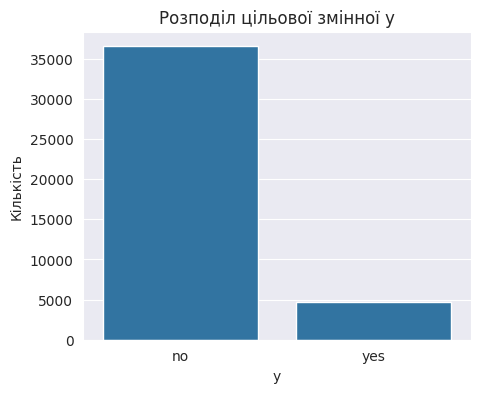

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Розподіл цільової змінної y")
plt.ylabel("Кількість")
plt.show()

Як бачимо в нас нерівномірний розподіл, 80% - 'no' клієнти які не підписали строковий депозит, решта 'yes', що підписали

## Multivariate Analysis




### Target dependency on other features


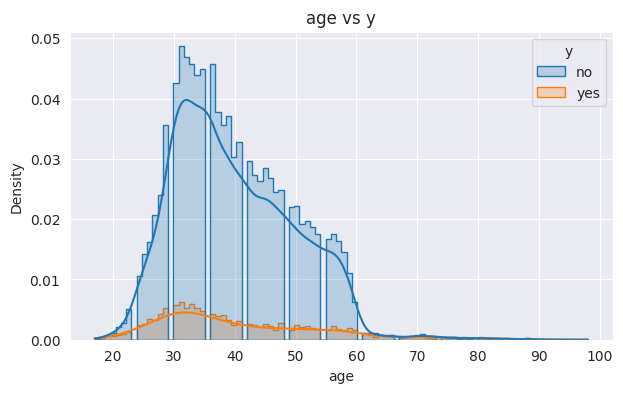

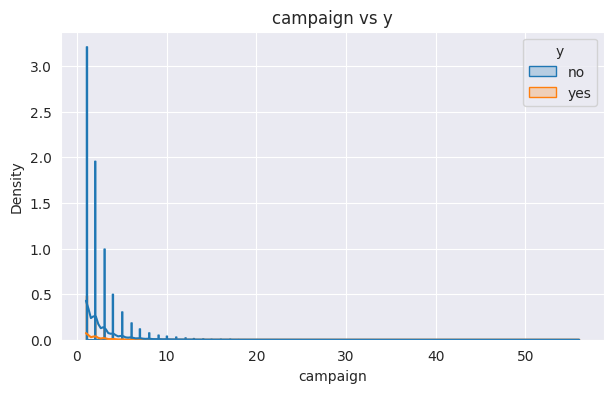

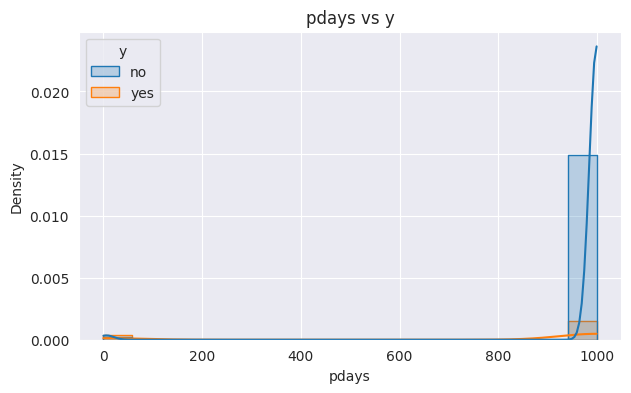

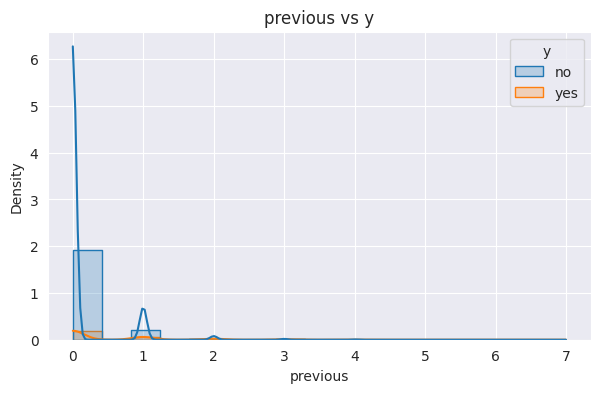

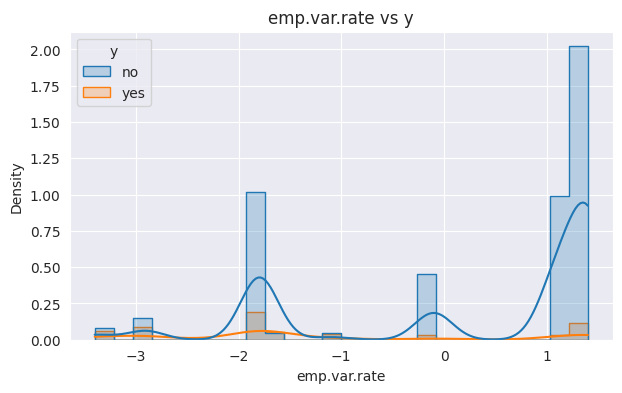

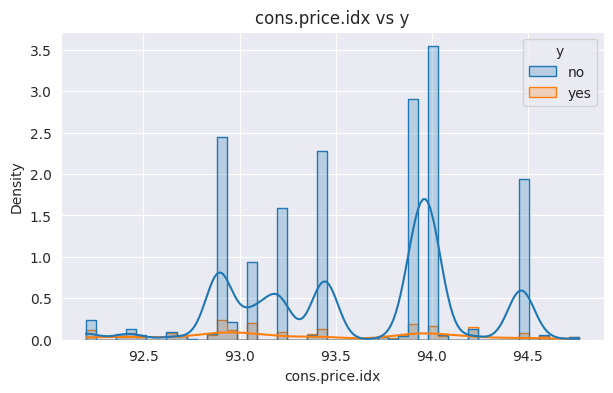

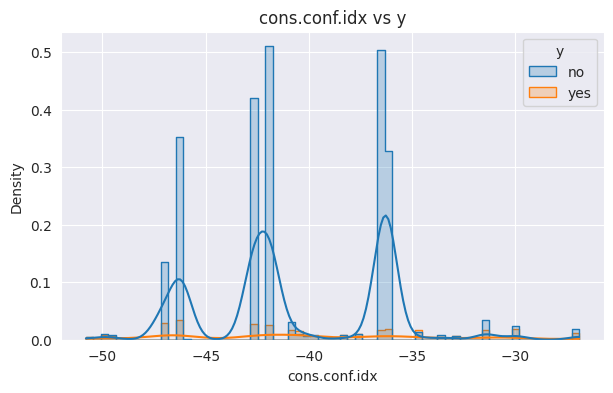

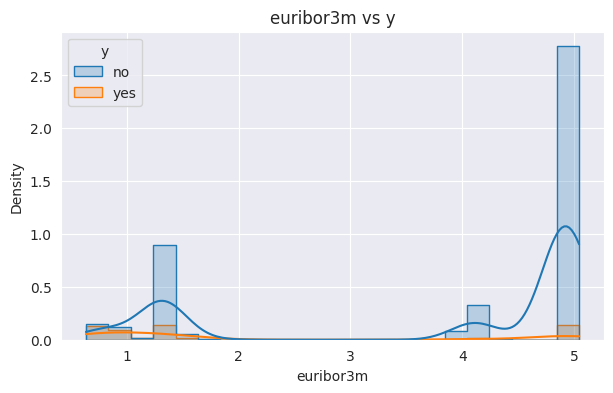

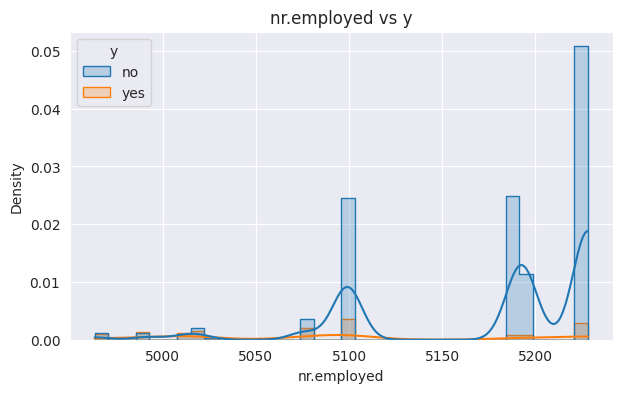

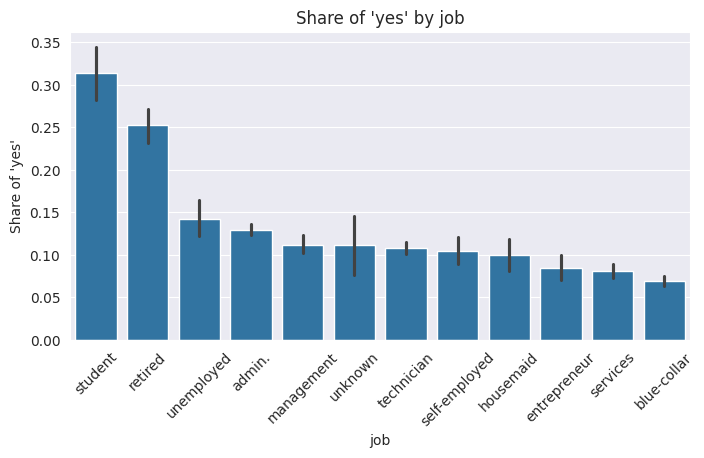

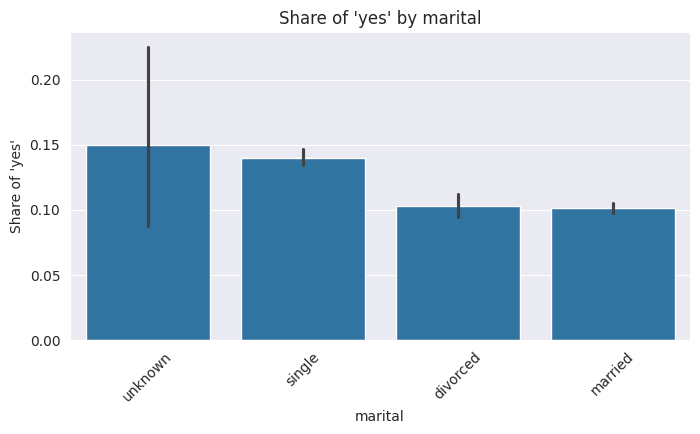

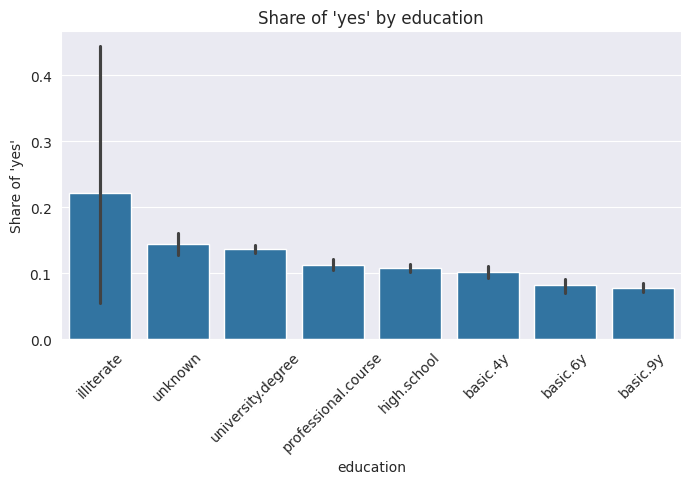

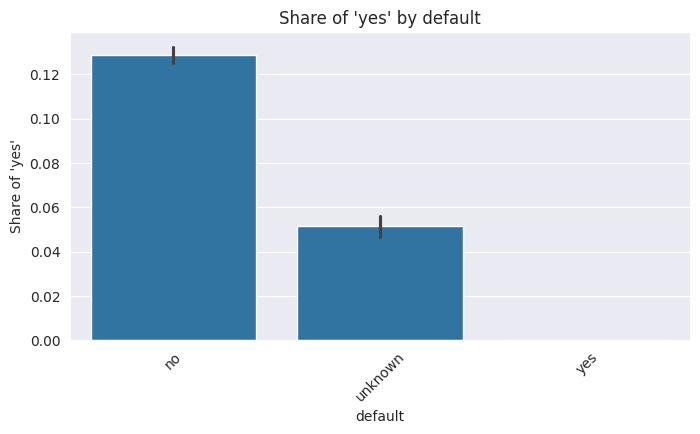

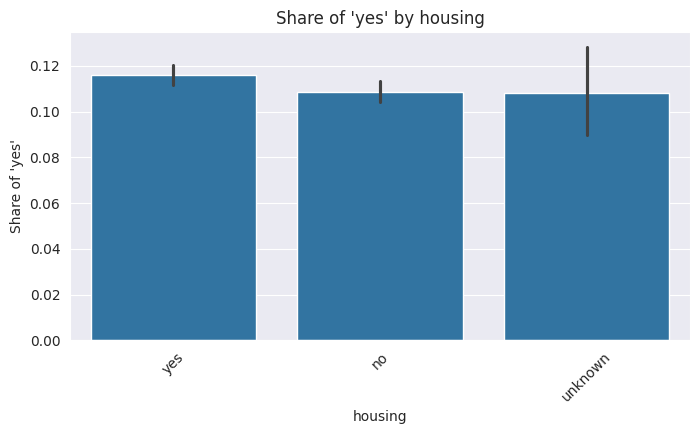

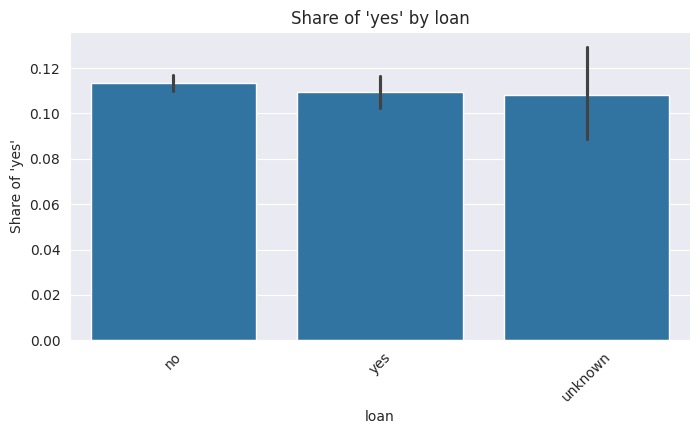

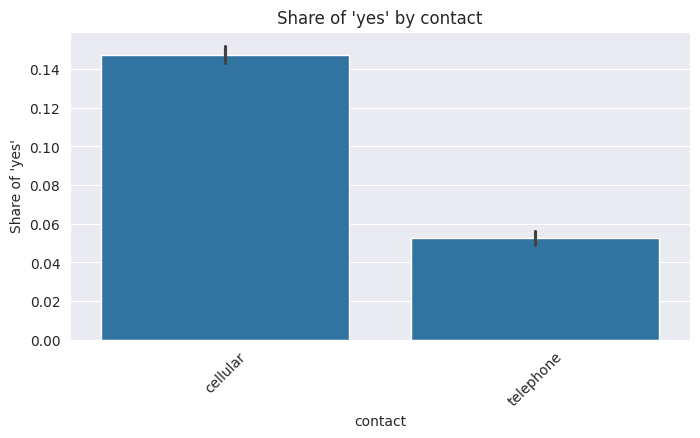

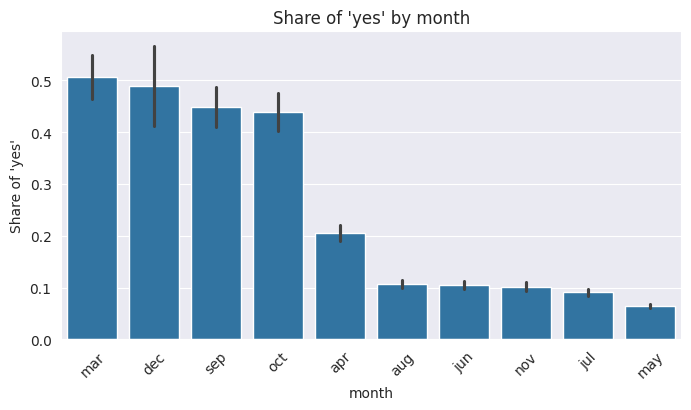

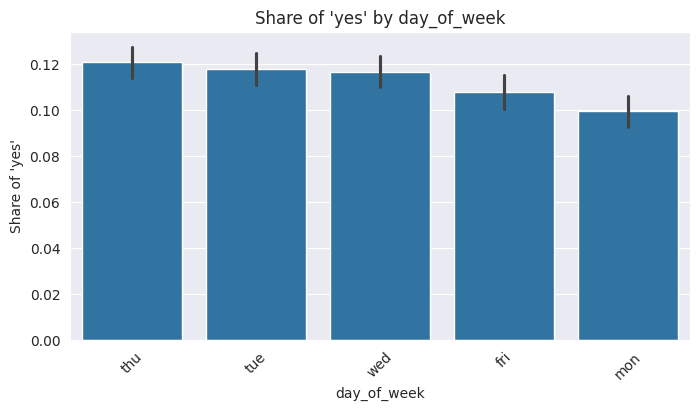

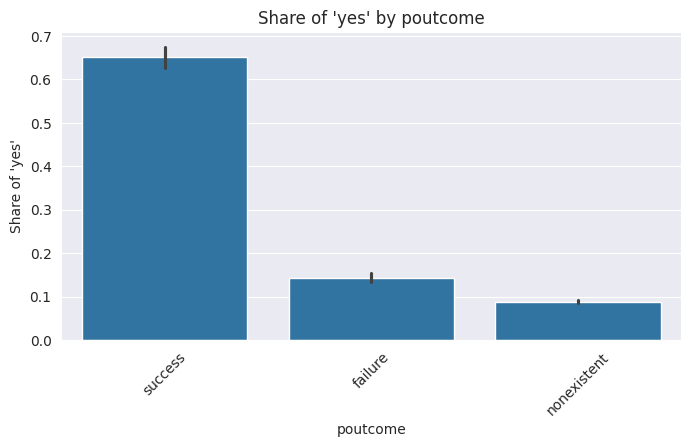

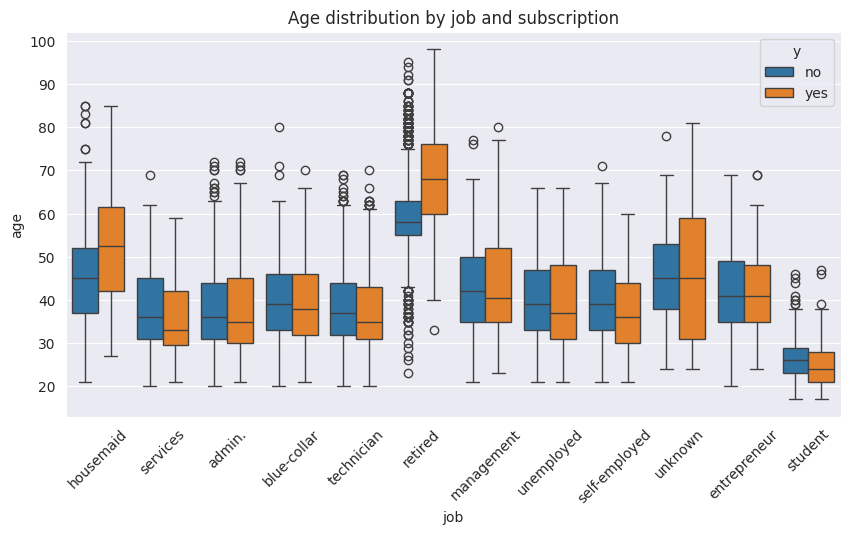

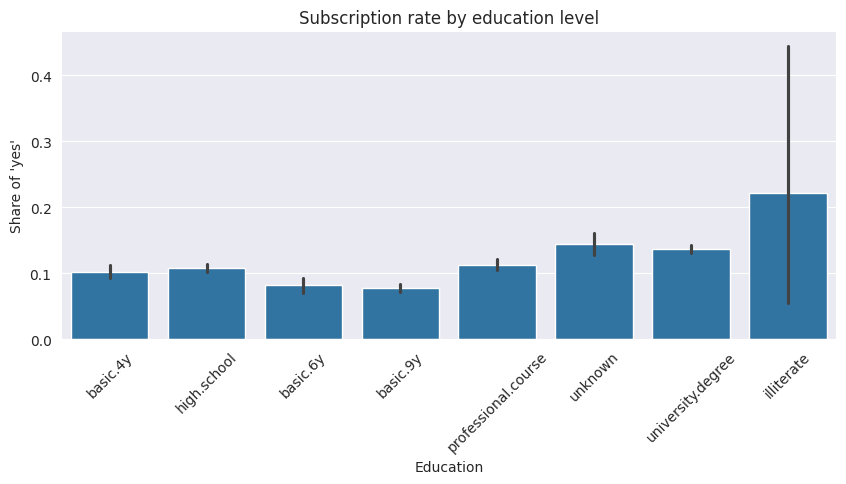

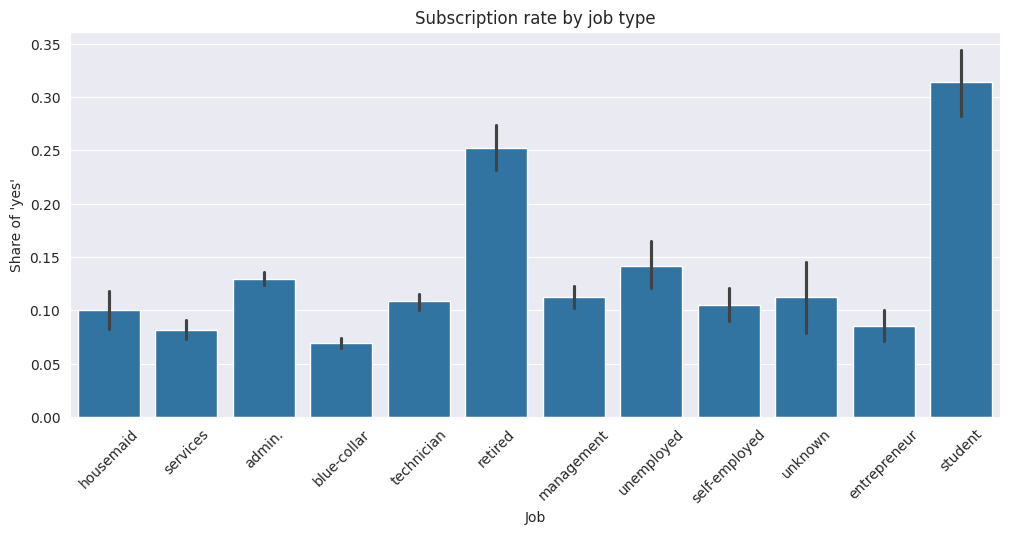

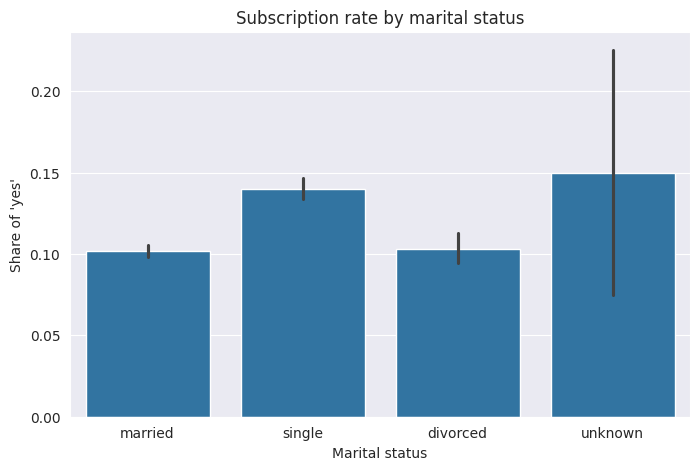

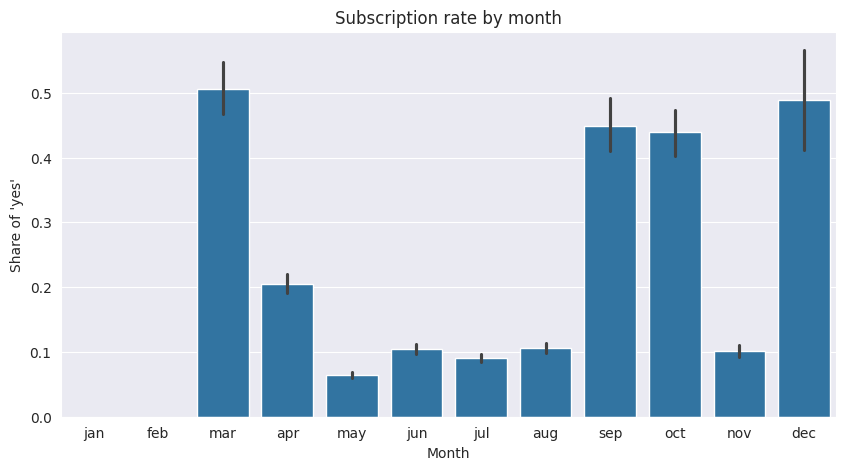

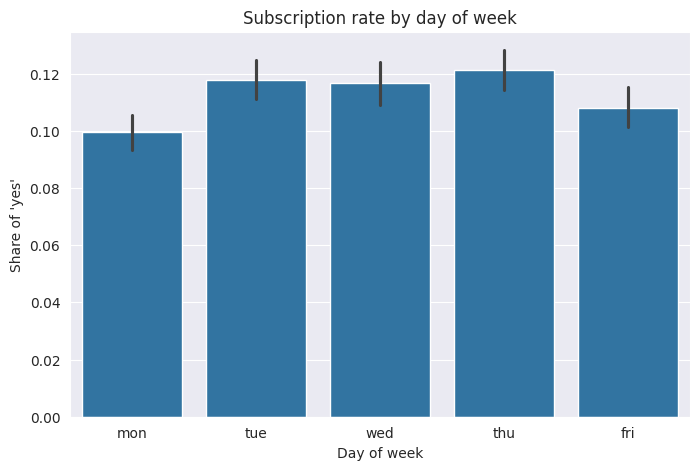

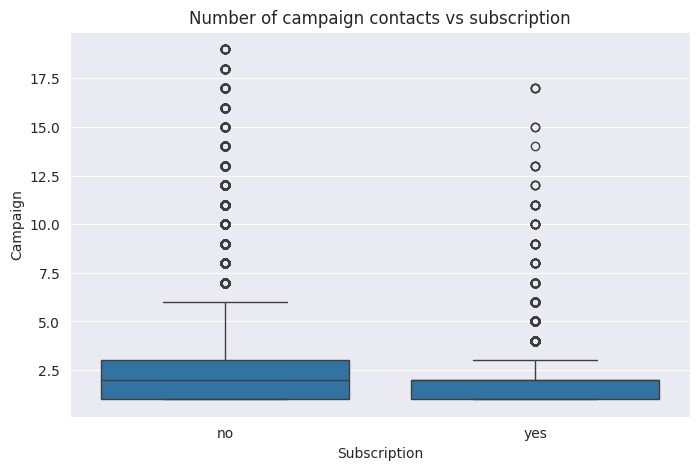

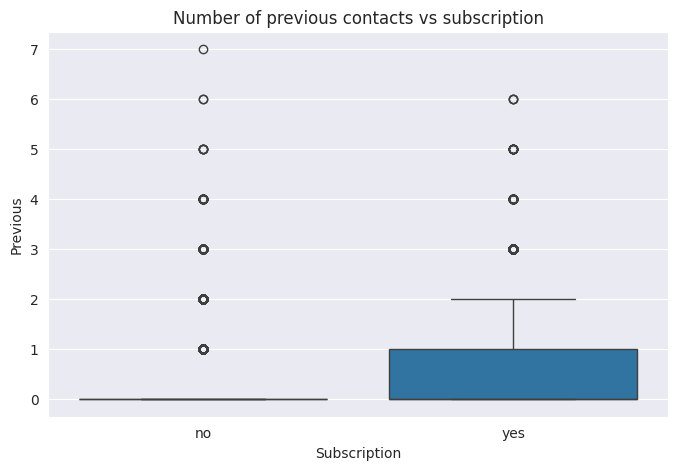

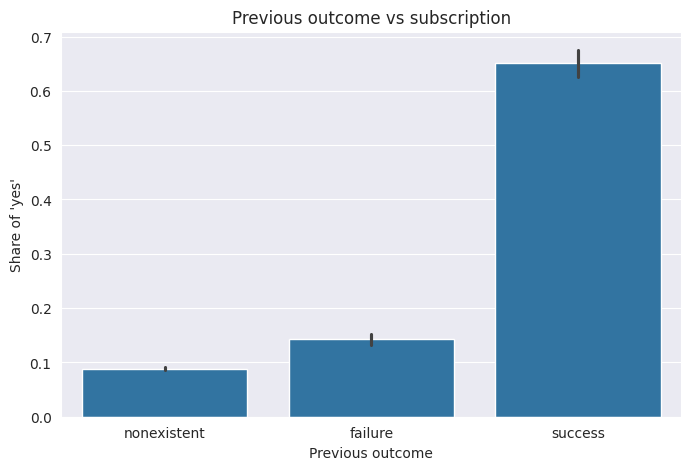

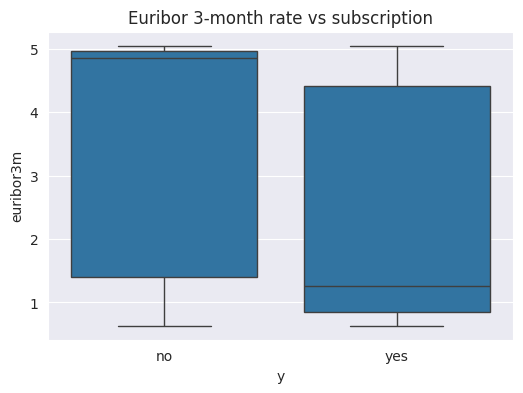

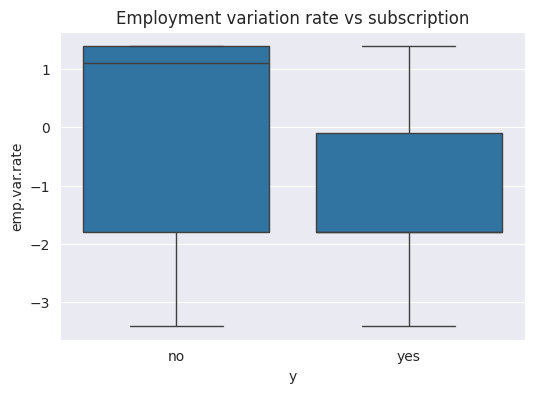

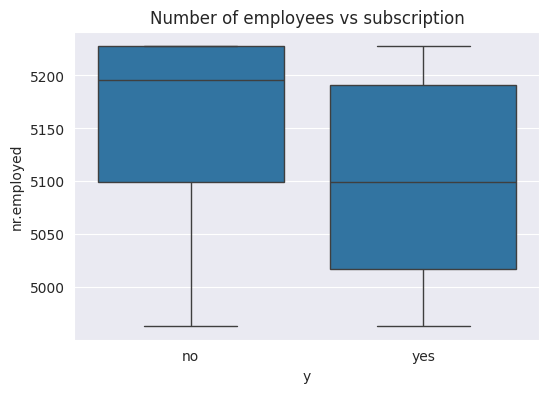

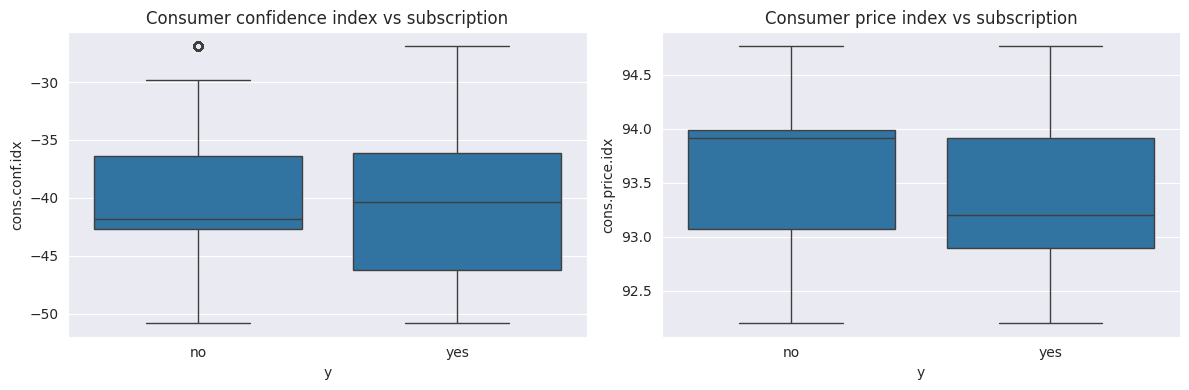

In [ ]:

df['y_bin'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['y_bin', 'duration'], errors='ignore')
for col in num_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=col, hue='y', kde=True, stat='density', element='step')
    plt.title(f"{col} vs y")
    plt.show()

cat_cols = df.select_dtypes(include=['object']).columns.drop('y')
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    order = df.groupby(col)['y_bin'].mean().sort_values(ascending=False).index
    sns.barplot(x=col, y='y_bin', data=df, order=order)
    plt.xticks(rotation=45)
    plt.ylabel("Share of 'yes'")
    plt.title(f"Share of 'yes' by {col}")
    plt.show()

# age by job and y
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='job', y='age', hue='y')
plt.xticks(rotation=45)
plt.title("Age distribution by job and subscription")
plt.show()

#  rate by education
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="education", y="y_bin")
plt.title("Subscription rate by education level")
plt.ylabel("Share of 'yes'")
plt.xlabel("Education")
plt.xticks(rotation=45)
plt.show()

# rate by job
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x="job", y="y_bin")
plt.title("Subscription rate by job type")
plt.ylabel("Share of 'yes'")
plt.xlabel("Job")
plt.xticks(rotation=45)
plt.show()

# rate by marital status
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="marital", y="y_bin")
plt.title("Subscription rate by marital status")
plt.ylabel("Share of 'yes'")
plt.xlabel("Marital status")
plt.show()

# rate by month
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="month", y="y_bin", order=[
    "jan", "feb", "mar", "apr", "may", "jun",
    "jul", "aug", "sep", "oct", "nov", "dec"
])
plt.title("Subscription rate by month")
plt.ylabel("Share of 'yes'")
plt.xlabel("Month")
plt.show()

# rate by day of week
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="day_of_week", y="y_bin", order=[
    "mon", "tue", "wed", "thu", "fri"
])
plt.title("Subscription rate by day of week")
plt.ylabel("Share of 'yes'")
plt.xlabel("Day of week")
plt.show()

# Campaign contacts vs subscription
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df["campaign"] < 20], x="y", y="campaign")
plt.title("Number of campaign contacts vs subscription")
plt.ylabel("Campaign")
plt.xlabel("Subscription")
plt.show()

# Previous contacts vs subscription
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df["previous"] < 20], x="y", y="previous")
plt.title("Number of previous contacts vs subscription")
plt.ylabel("Previous")
plt.xlabel("Subscription")
plt.show()

# Poutcome
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="poutcome", y="y_bin")
plt.title("Previous outcome vs subscription")
plt.ylabel("Share of 'yes'")
plt.xlabel("Previous outcome")
plt.show()

# Economic indicators
# euribor3m
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="y", y="euribor3m")
plt.title("Euribor 3-month rate vs subscription")
plt.show()

# emp.var.rate
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="y", y="emp.var.rate")
plt.title("Employment variation rate vs subscription")
plt.show()

# nr.employed
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="y", y="nr.employed")
plt.title("Number of employees vs subscription")
plt.show()

# Consumer confidence and price indexes
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data=df, x="y", y="cons.conf.idx", ax=axs[0])
axs[0].set_title("Consumer confidence index vs subscription")
sns.boxplot(data=df, x="y", y="cons.price.idx", ax=axs[1])
axs[1].set_title("Consumer price index vs subscription")
plt.tight_layout()
plt.show()



* Клієнти з вищою освітою (особливо university degree) частіше погоджуються на оформлення депозиту.

* Найвища ймовірність підписки серед представників професій: admin., management, technician.


* Основна активна група — 30–40 років.
Водночас, клієнти старші 60 частіше підписують депозит.
* Сімейний стан - Single та divorced мають вищу ймовірність оформити депозит, ніж married.
* Якщо клієнт вже мав успішні контакти з банком у минулому — шанс підписки суттєво зростає.


* campaign - занадто багато дзвінків знижує конверсію. Найкраще працює 1–2 контакти.

* Сезонність - Найвища частка "yes" у березні, вересні та жовтні.
Найрезультативніші дні тижня — понеділок і середа.

* Економічні умови

Вищий інтерес до депозитів спостерігається за умов:
• Низької міжбанківської ставки (euribor3m)
• Зниження рівня зайнятості (emp.var.rate < 0, nr.employed )
• Низької довіри споживачів (cons.conf.idx )

Побудова кореляційної матриці для клієнтів які підписали строковий депозит

In [ ]:
df1 = df[df['y'] == 'yes']

In [ ]:
df0 = df[df['y'] == 'no']

In [ ]:
corr_df = df1.select_dtypes(include='number').corr()

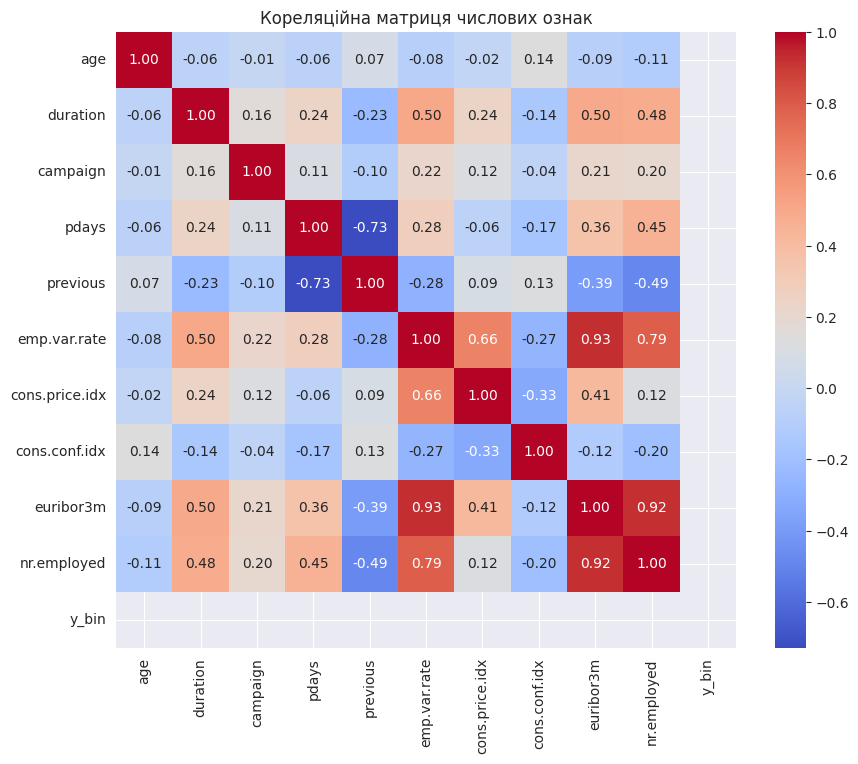

In [ ]:
num_cols = df1.select_dtypes(include="number").columns
corr_matrix = df1[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кореляційна матриця числових ознак")
plt.show()

Подивимось на 10 найкращих кореляцій


In [ ]:
corr_df[corr_df <= 0.99].unstack().sort_values(ascending = False).head(22)

,,0
euribor3m,emp.var.rate,0.926117
emp.var.rate,euribor3m,0.926117
nr.employed,euribor3m,0.922214
euribor3m,nr.employed,0.922214
emp.var.rate,nr.employed,0.787633
nr.employed,emp.var.rate,0.787633
cons.price.idx,emp.var.rate,0.660341
emp.var.rate,cons.price.idx,0.660341
duration,emp.var.rate,0.503056
emp.var.rate,duration,0.503056


як бачимо найкраще між собою корелюють атрибути соціально-економічного контексту

Побудова кореляційної матриці для клієнтів які  НЕ підписали строковий депозит

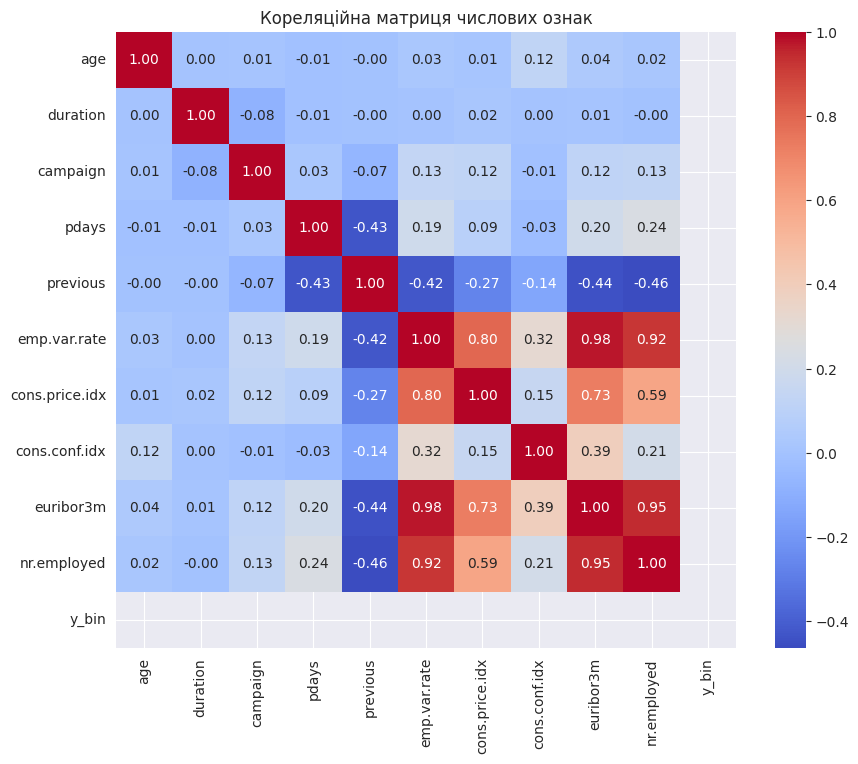

,,0
euribor3m,emp.var.rate,0.975955
emp.var.rate,euribor3m,0.975955
nr.employed,euribor3m,0.947250
euribor3m,nr.employed,0.947250
emp.var.rate,nr.employed,0.921768
nr.employed,emp.var.rate,0.921768
cons.price.idx,emp.var.rate,0.797180
emp.var.rate,cons.price.idx,0.797180
euribor3m,cons.price.idx,0.730782
cons.price.idx,euribor3m,0.730782


In [ ]:
corr_df0 = df0.select_dtypes(include='number').corr()
num_cols = df0.select_dtypes(include="number").columns
corr_matrix = df0[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кореляційна матриця числових ознак")
plt.show()
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(22)

спостерігаємо схожу ситуація стосовно кореляцій і для клієнтів які не підписали строковий депозит

## EDA Summary & Hypotheses


Висновки:


*   Вік: основна група клієнтів 30–40 років; клієнти старше 60 частіше підписують депозит.
*   клієнти з вищою освітою та професійних сфер (management, admin, technician) частіше погоджуються

* одружені менш схильні підписувати депозит, ніж одинаки або розлучені


* найкращі результати в окремі місяці (наприклад, весна/осінь), у будні дні


* Маркетингові кампанії (campaign, previous, poutcome) - якщо попередні контакти були успішними → вищий шанс(перевірити)

* Економічні індикатори (euribor3m, emp.var.rate, nr.employed, cons.conf.idx, cons.price.idx):виявлено кореляції: у періоди низьких ставок та нижчої зайнятості клієнти частіше відкривали депозити;





# Train / Validation / Test Split

Створюємо нові ознаки

In [ ]:
df["was_contacted"] = (df["pdays"] != 999).astype(int)
df["is_senior"] = (df["age"] > 60).astype(int)

df["campaign_bin"] = pd.cut(
    df["campaign"],
    bins=[0, 1, 3, 10, df["campaign"].max()],
    labels=["1", "2-3", "4-10", "11+"],
    include_lowest=True
)
df["y_bin"] = df["y"].map({"no": 0, "yes": 1})


In [ ]:
from sklearn.model_selection import train_test_split

df_prep = df.copy()
X = df_prep.drop(columns=["y", "y_bin", "duration"])
y = df_prep["y_bin"]


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, stratify=y, test_size=0.4, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=42
)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)


Train size: (24712, 22)
Validation size: (8238, 22)
Test size: (8238, 22)


# Feature Preprocessing




In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [ ]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include="object").columns.tolist()

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

# Model Training & Evaluation



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

roc_auc_all_models = {}
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    pipe.fit(X_train, y_train)

    model_scores = {}
    for split_name, (X_split, y_split) in {
        "Train": (X_train, y_train),
        "Validation": (X_val, y_val),
        "Test": (X_test, y_test)
    }.items():
        y_proba = pipe.predict_proba(X_split)[:, 1]
        model_scores[split_name] = round(roc_auc_score(y_split, y_proba), 4)

    roc_auc_all_models[name] = model_scores

roc_auc_all_df = pd.DataFrame(roc_auc_all_models).T
roc_auc_all_df

,Train,Validation,Test
Logistic Regression,0.7895,0.8006,0.8019
kNN,0.9236,0.7321,0.7289
Decision Tree,0.9999,0.6163,0.6352
XGBoost,0.9108,0.7926,0.7915


Logistic Regression — можна брати як  бейзлайн.

XGBoost — дуже перспективна, трохи недотягує → є сенс виконати тюнінг гіперпараметрів.

kNN і Decision Tree — Сильно переобучені, на  тесті суттєво гірше.

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from random import Random

# === RandomizedSearchCV pipeline ===
xgb_pipeline_rscv = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ))
])

param_distributions = {
    "classifier__n_estimators": randint(50, 300),
    "classifier__max_depth": randint(2, 10),
    "classifier__learning_rate": uniform(0.01, 0.3),
    "classifier__subsample": uniform(0.5, 0.5),
    "classifier__colsample_bytree": uniform(0.5, 0.5),
    "classifier__gamma": uniform(0, 0.3)
}

random_search = RandomizedSearchCV(
    xgb_pipeline_rscv,
    param_distributions=param_distributions,
    n_iter=20,
    scoring="roc_auc",
    n_jobs=-1,
    cv=3,
    verbose=0,
    random_state=42
)
random_search.fit(X_train, y_train)
best_model_rscv = random_search.best_estimator_

# === Hyperopt pipeline ===
space = {
    "max_depth": hp.quniform("max_depth", 3, 10, 1),
    "learning_rate": hp.uniform("learning_rate", 0.01, 0.3),
    "n_estimators": hp.quniform("n_estimators", 50, 300, 1),
    "gamma": hp.uniform("gamma", 0, 0.3),
    "subsample": hp.uniform("subsample", 0.5, 1.0),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.5, 1.0),
}

def objective(params):
    model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42,
            max_depth=int(params["max_depth"]),
            n_estimators=int(params["n_estimators"]),
            learning_rate=params["learning_rate"],
            gamma=params["gamma"],
            subsample=params["subsample"],
            colsample_bytree=params["colsample_bytree"]
        ))
    ])
    auc = cross_val_score(model, X_train, y_train, scoring="roc_auc", cv=3).mean()
    return {"loss": -auc, "status": STATUS_OK}

trials = Trials()
rstate = np.random.default_rng(42)

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=rstate

)
best_hyperopt_params = {
    "max_depth": int(best["max_depth"]),
    "n_estimators": int(best["n_estimators"]),
    "learning_rate": round(best["learning_rate"], 4),
    "gamma": round(best["gamma"], 4),
    "subsample": round(best["subsample"], 4),
    "colsample_bytree": round(best["colsample_bytree"], 4)
}

best_model_hyperopt = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        **best_hyperopt_params
    ))
])
best_model_hyperopt.fit(X_train, y_train)


100%|██████████| 50/50 [02:20<00:00,  2.80s/trial, best loss: -0.7932622780056796]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed',
                                                   'was_contacted',
                                                   'is_senior']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer...
                               gamma=np.float64(0.1231), grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=np.float64(0.0209), max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=6,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=123,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [ ]:
def get_roc_auc(model, label):
    return {
        "Train": round(roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]), 4),
        "Validation": round(roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]), 4),
        "Test": round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]), 4),
        "Source": label
    }

results_rscv = get_roc_auc(best_model_rscv, "RandomizedSearchCV")

results_hopt = get_roc_auc(best_model_hyperopt, "Hyperopt")

comparison = pd.DataFrame([results_rscv, results_hopt])
comparison.set_index("Source", inplace=True)
comparison


,Train,Validation,Test
Source,,,
RandomizedSearchCV,0.8203,0.8096,0.8142
Hyperopt,0.8283,0.8105,0.8157


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

param_grid = {
    "classifier__max_depth": [3, 5, 10, 15, 20],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 5],
    "classifier__criterion": ["gini", "entropy"]
}

grid = GridSearchCV(tree_pipeline, param_grid=param_grid, scoring="roc_auc", cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_tree_model = grid.best_estimator_

def get_roc_auc(model, label):
    return {
        "Train": round(roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]), 4),
        "Validation": round(roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]), 4),
        "Test": round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]), 4),
        "Source": label
    }

tuned_tree_results = get_roc_auc(best_tree_model, "Tuned Decision Tree")
tuned_tree_results


Fitting 3 folds for each of 90 candidates, totalling 270 fits


{'Train': np.float64(0.7802),
 'Validation': np.float64(0.7844),
 'Test': np.float64(0.7887),
 'Source': 'Tuned Decision Tree'}

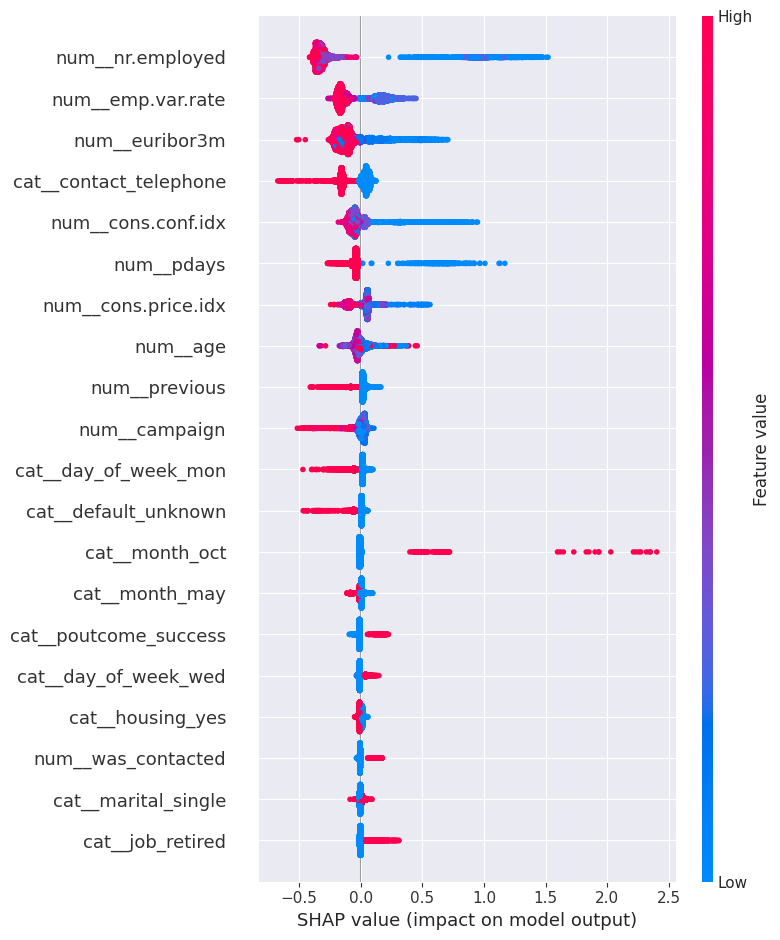

In [ ]:
import shap
best_model_hyperopt.named_steps["classifier"].get_booster().feature_names = X_train.columns.tolist()

explainer = shap.TreeExplainer(best_model_hyperopt.named_steps["classifier"])
X_transformed = preprocessor.transform(X_val)
shap_values = explainer.shap_values(X_transformed)

shap.summary_plot(shap_values, X_transformed, feature_names=preprocessor.get_feature_names_out())


Список ознак зліва — відсортований за важливістю впливу на модель (зверху найважливіші).

Точки на графіку — це SHAP-значення для кожного прикладу в тестовому наборі. Вони показують, наскільки та чи інша ознака змінила ймовірність позитивного результату.

Колір точки — значення самої ознаки:

🔴 червоний = високе значення ознаки

🔵 синій = низьке значення ознаки

Топ 5 ознак:
1. num__nr.employed:

Найбільш важлива ознака.

Чим вищий рівень зайнятості, тим менша ймовірність підписання депозиту (високі значення в червоному зліва — тобто SHAP < 0).

2. num__emp.var.rate (темп зміни зайнятості):

Високе значення також зменшує ймовірність підписання (червоні точки здебільшого з SHAP < 0).

3. num__euribor3m (ставка EURIBOR):

Чим вища ставка, тим менша ймовірність (аналогічна поведінка).

4. cat__contact_telephone:

Якщо клієнта контактували по телефону — це зменшує шанси, мабуть через агресивність або неактуальність каналу.

5. num__cons.conf.idx / num__cons.price.idx:

Індекси довіри/цін — мають різноспрямований вплив, залежно від значення.

6. num__age:

Немає сильного впливу загалом, вплив слабкий, але на окремих випадках може бути значущий.

# Error Analysis and ROC Curve

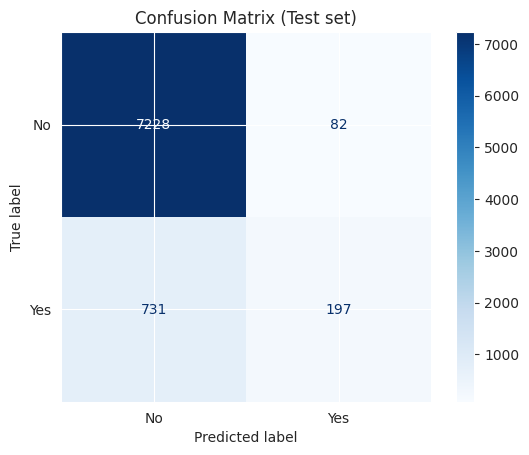

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model_hyperopt.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix (Test set)")
plt.show()

False Positives (FP) — 82 клієнти, які не підписали депозит, але модель передбачила, що підпишуть.
 Це не критично, але в реальному банківському кейсі може означати неефективне використання ресурсу (наприклад, зв'язались з клієнтом, який був не зацікавлений).

Можна зменшити шляхом налаштування порогу класифікації.

False Negatives (FN) — 731 клієнт, який реально підписав депозит, але модель не передбачила цього.

Це найбільш критичні помилки. Бізнес втрачає потенційно цінних клієнтів, з якими не зв'язались.

Модель виявляє тільки ~21% клієнтів, які реально підписали депозит (197 / (731+197) ≈ 21% Recall для класу "Yes").

  Як висновок - існує  незбалансованість класів, і модель краще навчається на класі “No”.

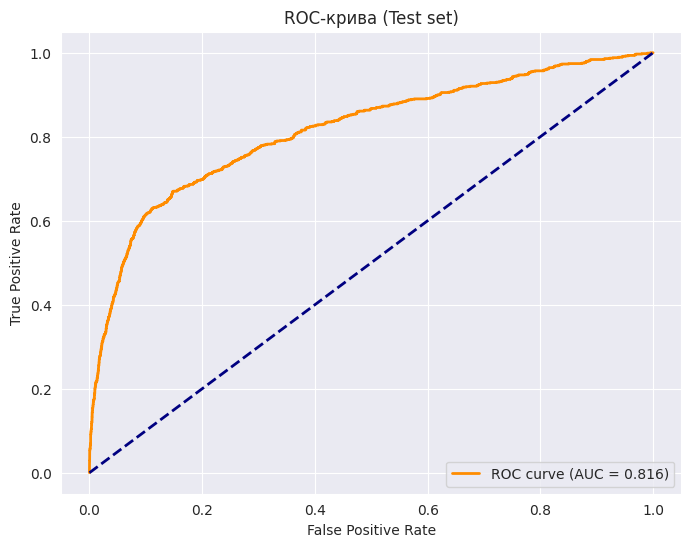

In [ ]:
y_pred_proba = best_model_hyperopt.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива (Test set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



Значення AUC = 0.816 означає, що з ймовірністю 81.6% модель віддасть вищу ймовірність позитивному прикладу, ніж негативному.


Модель здатна ефективно розпізнавати клієнтів, які ймовірно підпишуть депозит, що є ключовим бізнес-інсайтом.

# Final Conclusions

In [ ]:

results_table = pd.DataFrame([
    {"Source": "Logistic Regression", "Train": 0.7895, "Validation": 0.8006, "Test": 0.8019},
    {"Source": "kNN", "Train": 0.9236, "Validation": 0.7321, "Test": 0.7289},
    {"Source": "Decision Tree (base)", "Train": 0.9999, "Validation": 0.6163, "Test": 0.6352},
    {"Source": "Tuned Decision Tree", "Train": 0.7802, "Validation": 0.7843, "Test": 0.7884},
    {"Source": "XGBoost", "Train": 0.9108, "Validation": 0.7926, "Test": 0.7915},
    {"Source": "RandomizedSearchCV", "Train": 0.8201, "Validation": 0.8102, "Test": 0.8152},
    {"Source": "Hyperopt", "Train": 0.8285, "Validation": 0.8096, "Test": 0.8152}
])

comments = {
    "Logistic Regression": "Стабільна, проста в інтерпретації модель. Рекомендується як базова.",
    "kNN": "Має перенавчання. Низькі показники на валідації та тесті.",
    "Decision Tree (base)": "Сильно перенавчена. Не рекомендується без тюнінгу.",
    "Tuned Decision Tree": "Покращена, але все ще поступається бустингу.",
    "XGBoost": "Сильна модель, але потребує тюнінгу для повної потужності.",
    "RandomizedSearchCV": "Дає стабільні результати. Варто використовувати.",
    "Hyperopt": "Найкраща за узагальненням. Дає найвищу якість на тесті."
}

results_table["Коментар"] = results_table["Source"].map(comments)

results_table = results_table.sort_values(by="Test", ascending=False).reset_index(drop=True)

from IPython.display import display, Markdown

markdown_table = results_table.to_markdown(index=False)
display(Markdown(f"### Порівняльна таблиця моделей\n\n{markdown_table}"))



### Порівняльна таблиця моделей

| Source               |   Train |   Validation |   Test | Коментар                                                            |
|:---------------------|--------:|-------------:|-------:|:--------------------------------------------------------------------|
| Hyperopt             |  0.8285 |       0.8096 | 0.8152 | Найкраща за узагальненням. Дає найвищу якість на тесті.             |
| RandomizedSearchCV   |  0.8201 |       0.8102 | 0.8152 | Дає стабільні результати. Варто використовувати.                    |
| Logistic Regression  |  0.7895 |       0.8006 | 0.8019 | Стабільна, проста в інтерпретації модель. Рекомендується як базова. |
| XGBoost              |  0.9108 |       0.7926 | 0.7915 | Сильна модель, але потребує тюнінгу для повної потужності.          |
| Tuned Decision Tree  |  0.7802 |       0.7843 | 0.7884 | Покращена, але все ще поступається бустингу.                        |
| kNN                  |  0.9236 |       0.7321 | 0.7289 | Має перенавчання. Низькі показники на валідації та тесті.           |
| Decision Tree (base) |  0.9999 |       0.6163 | 0.6352 | Сильно перенавчена. Не рекомендується без тюнінгу.                  |